In [8]:
from PIL import Image, ImagePalette

# Colors available on lego pick-a-brick as a 1x1 plate
colors = {
    "B3D7D1":"aqua",
    "000000":"black",
    "E4CD9E":"brick yellow",
    "0055BF":"bright blue",
    "008F9B":"bright bluish green",
    "4B9F4A":"bright green",
    "FE8A18":"bright orange",
    "C870A0":"bright purple",
    "C91A09":"bright red",
    "923978":"Bright Reddish Violet",
    "F2CD37":"Bright Yellow",
    "DFEEA5":"Bright Yellowish Green",
    "FFF03A":"cool yellow",
    "078BC9":"Dark Azur",
    "352100":"Dark Brown",
    "184632":"Dark Green",
    "A95500":"dark orange",
    "720E0F":"Dark Red",
    "6C6E68":"Dark Stone Grey",
    "0A3463":"Earth Blue",
    "184632":"earth green",
    "F8BB3D":"Flame Yellowish Orange",
    "F6D7B3":"light nougat",
    "CD6298":"Light Purple",
    "9FC3E9":"Light Royal Blue",
    "36AEBF":"Medium Azure",
    "5A93DB":"medium blue",
    "AC78BA":"Medium Lavender",
    "3F3691":"Medium Lilac",
    "AA7D55":"Medium Nougat",
    "A0A5A9":"medium stone grey",
    "9B9A5A":"Olive Green",
    "582A12":"Reddish Brown",
    "A0BCAC":"sand green",
    "958A73":"Sand Yellow",
    "FF698F":"Vibrant Coral",
    "FFFFFF":"White",
}

# TODO: this is gonna take forever
tilePrices = {
  (1,1): 0.05,
  (1,2): 0.07,
  (1,3): 0.07,
  (1,4): 0.10,
  (1,5): 0.22
}

def quantizePalette(im, palette):
    p = Image.new("P", (1,1))
    palette += (768-len(palette))*[0]
    p.putpalette(palette)
    return im.convert("RGB").quantize(palette=p)

def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  return rgb

def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

palette = []
for x in colors:
  palette += hex_to_rgb(x)

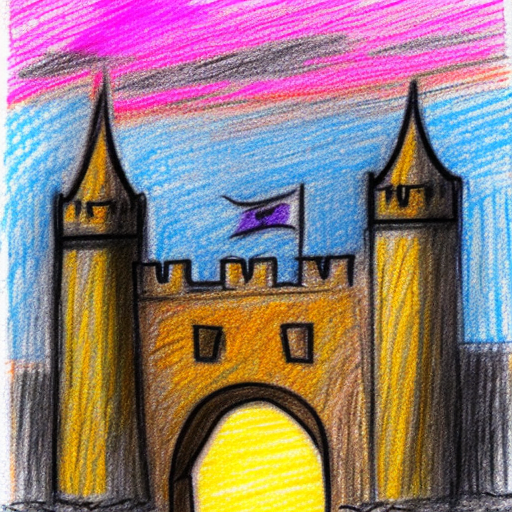

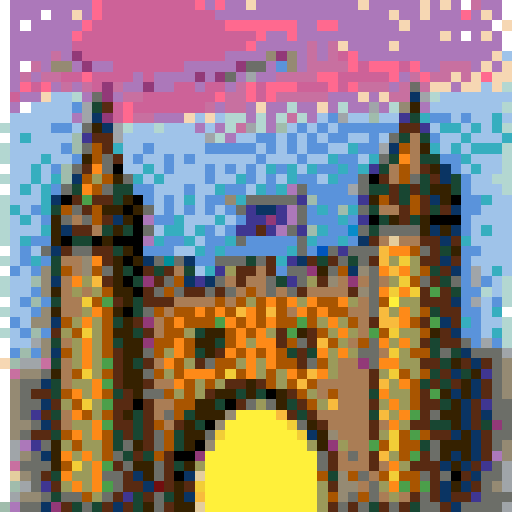

In [18]:
tilesW = 50
tilesH = 50
imagePath = r"./test.png"

img = Image.open(imagePath)
previewImg = img.resize((512, 512), resample=Image.NEAREST)
display(previewImg) # original image
img = img.resize((tilesW, tilesH))
img = quantizePalette(img, palette)
img = img.convert("RGB")
previewImg = img.resize((512, 512), resample=Image.NEAREST)
display(previewImg) # palettized image


In [19]:
colorCounts = {}
for x in range(tilesW):
    for y in range(tilesH):
        col = img.getpixel((x, y))
        col = rgb_to_hex(col).upper()
        colorName = colors[col]
        if colorName not in colorCounts:
          colorCounts[colorName] = 1
        else:
          colorCounts[colors[col]] += 1

print(f"{tilesW}x{tilesH} ({tilesW*tilesH}) tiles, ~USD{tilesW*tilesH*tilePrice}")
print(f"Requires {len(colorCounts)} different colors:")
for c in colorCounts:
  print(f"{c}: {colorCounts[c]}")

50x50 (2500) tiles, ~USD125.0
Requires 34 different colors:
White: 46
aqua: 45
light nougat: 34
sand green: 16
Medium Lavender: 236
Light Purple: 132
Light Royal Blue: 242
Medium Azure: 75
medium blue: 169
bright purple: 55
Sand Yellow: 48
medium stone grey: 28
brick yellow: 4
Vibrant Coral: 44
Dark Stone Grey: 177
Reddish Brown: 194
Medium Lilac: 29
Earth Blue: 66
earth green: 107
Dark Brown: 107
Bright Reddish Violet: 21
black: 32
dark orange: 145
Medium Nougat: 109
Olive Green: 103
bright orange: 80
Bright Yellow: 20
bright green: 21
Flame Yellowish Orange: 18
Dark Red: 1
bright bluish green: 1
cool yellow: 93
bright blue: 1
Dark Azur: 1
